In [2]:
#Kaggle Dataset: "https://www.kaggle.com/datasets/shayanfazeli/heartbeat"

In [ ]:
#Title: Ensemble Learning for ECG Heartbeat Classification Using CNN and LSTM Architectures

In [4]:
#Methodology:
#1. Data Collection and Preprocessing
#2. Feature Engineering
#3. Model Design and Architecture
#4. Training and Hyperparameter Tuning
#5. Evaluation Metrics
#6. Implementation of Ensemble Model
#7. Post-Processing and Model Interpretation

In [ ]:
#Novelty of the Project:
#1)Combination of CNN & LSTM Architecture
#2)Ensemble Learning Approach
#3)Enchanced Classification Performance
#4)Handling Temporal & Spatial Features
#5)Improved Model

In [6]:
import numpy as np 
import pandas as pd
import os

In [7]:
import tensorflow as tf

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score #confusion_matrix:measurement for classification models #accuracy_score:accuracy of a classification model

In [ ]:
from tensorflow.compat.v1 import ConfigProto #To allocate only as much GPU memory as is needed by the process
from tensorflow.compat.v1 import InteractiveSession #Control over how TensorFlow interacts with system resource

In [10]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [11]:
import matplotlib.pyplot as plt

In [12]:
train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)
print(train_df.shape) #Size of the array (rows_columns)
print(test_df.shape)

(87554, 188)
(21892, 188)


In [13]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# The Spatial features refer to the individual values (columns) of the ECG signal at different time points
# The Temporal features are the differences between consecutive columns (representing different time intervals or lags)

In [14]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Unique Classes in the Training & Testing Dataset:
print(train_df[train_df.columns[-1]].unique()) #-1 is used to dynamically refernce to the last column
print(train_df[test_df.columns[-1]].unique())

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


In [16]:
train_x = np.array(train_df[train_df.columns[0:-1]], dtype=np.float32) #selects all columns except the last one (Features)
train_y = np.array(train_df[train_df.columns[-1:]], dtype=np.float32) #selects last column (Labels)

test_x = np.array(train_df[test_df.columns[0:-1]], dtype=np.float32) 
test_y = np.array(train_df[test_df.columns[-1:]], dtype=np.float32)

In [17]:
train_x.shape, train_y.shape

((87554, 187), (87554, 1))

In [18]:
test_x.shape, test_y.shape

((87554, 187), (87554, 1))

In [19]:
#last column in both the training and test datasets has the same number of rows and columns for some reason

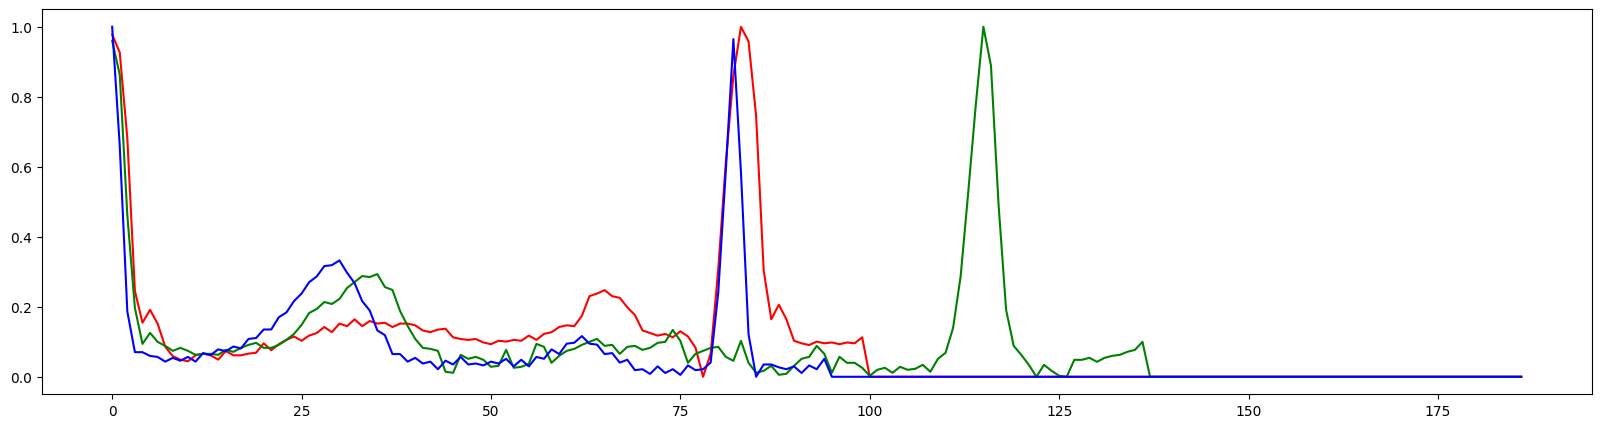

In [20]:
#Time series data of a single ECG beat
fig = plt.figure(figsize=(20,5)) #20x5 size
ax = fig.add_subplot(1,1,1) 
ax.plot(train_x[0], color="r")
ax.plot(train_x[1], color="g")
ax.plot(train_x[2], color="b")
plt.show()

In [ ]:
#RFE and feature scaling focus on selecting the most informative features from a static dataset, regardless of temporal aspects. (Used in Research Paper)
#Lagged time differences focus on engineering new temporal features to represent changes over time for sequence-based or time-series datasets.

In [21]:
#Lagged Differences (Feature Selection Model)
#It follows an ECG signal differencing algorithm with lagged differences, where changes between heartbeats (signal values) 
#are computed over specific time intervals (lags) to capture the temporal dynamics

# Return difference array (Useful in represent the difference in values between two points in time, scaled to a normalized range)
#Compute lagged differences between columns of the dataset.
def return_diff_array_table(array, dur):   #Calculates the difference between columns of an input 2D array(mxn) specific duration (lag) (dur)
  for idx in range(array.shape[1]-dur):
    before_col = array[:,idx]
    after_col = array[:,idx+dur]
    new_col = ((after_col - before_col)+1)/2
    new_col = new_col.reshape(-1,1)
    if idx == 0:
      new_table = new_col
    else :
      new_table = np.concatenate((new_table, new_col), axis=1)
      
#Create new features by stacking the lagged difference arrays to the original dataset.
#For concat add zero padding
  padding_array = np.zeros(shape=(array.shape[0],dur)) #Creates a 2D array of zeros
  new_table = np.concatenate((padding_array, new_table), axis=1) #concatenates the padding_array of zeros with the previously computed new_table along the columns(axis=1)
  return new_table

#Modified dataset (with additional difference-based features) for machine learning
#Concat
def return_merge_diff_table(df, diff_dur): #how many columns apart the differences should be calculated (diff_dur)
  fin_table = df.reshape(-1,187,1,1) #Making it a 4D array for Computation & Modelling
  for dur in diff_dur:
    temp_table = return_diff_array_table(df, dur) #Returns temporary array (temp_table) of differences
    fin_table = np.concatenate((fin_table, temp_table.reshape(-1,187,1,1)), axis=2) #Temporary difference array (temp_table) is reshaped into a 4D array of the same dimension
  return fin_table

#Axis=2 is used to concatenate along the third axis because you're adding more features to the dataset
#Use "stratify" option for training = Maintain the Same proportion of classes
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, stratify=train_y)

#Add Data
x_train = return_merge_diff_table(df=x_train, diff_dur=[1])
x_val = return_merge_diff_table(df=x_val, diff_dur=[1])

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(70043, 187, 2, 1) (70043, 1) (17511, 187, 2, 1) (17511, 1)


In [22]:
#187 features per sample, with 2 channels (original and difference data)
#70,043 training samples and 17,511 validation samples
#4D array : (a,b,c,d)

In [23]:
#For see a model's result (i.e. By predicting the labels for the training and testing data)
def return_result(model, x_train, x_test, y_train, y_test):
    y_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    pred_list=[]
    for x in y_pred:
        pred_list.append(np.argmax(x))
    train_pred_list=[]
    for x in train_pred:
        train_pred_list.append(np.argmax(x)) #Finds the Index of the Maximum Value in each Prediction Vector x, which represents the predicted class
    test_mat = confusion_matrix(y_test, pred_list) #Computes the confusion matrix for the test data, comparing the true labels y_test with the predicted labels pred_list
    train_mat = confusion_matrix(y_train, train_pred_list) #Similarrly, Computes the confusion matrix for the train data
    print("In train")
    print(accuracy_score(y_train, train_pred_list))
    print(train_mat)
    print("In test")
    print(accuracy_score(y_test, pred_list))
    print(test_mat)

In [24]:
#CNN Model
#It builds and returns a Convolutional Neural Network designed for classifying ECG signals into one of 5 categories
def return_model1():
    input_tens = tf.keras.Input(shape=(187,2,1)) #Conv2D Layer: 187=Length 2=Channels 1=Depth of the Input
    x = tf.keras.layers.Conv2D(256, kernel_size=(10,2), strides=(5,1),padding='valid')(input_tens) #256=Filters (10,2)=Kernel Size (5,1)=Stride; Kernel size is 10 time septs and both channels at once
    x = tf.keras.layers.BatchNormalization()(x) #Normalizes the O/P to stablizie & speed up training
    x = tf.keras.layers.ReLU()(x) #ReLU:Non-Linearity
    x = tf.keras.layers.Dropout(rate=0.5)(x) #Dropout(50%): Randomly Drops 50% of neurons (due to overfitting)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x) #Subsequent Layers
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(128, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x) #Reduces the Dimensions by taking the avg over height,width,channels to just channels
    x = tf.keras.layers.Dense(5, activation="softmax")(x)
    model = tf.keras.Model(inputs=input_tens, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    print(model.summary())
    return model

In [25]:
model1 = return_model1()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 187, 2, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 36, 1, 256)     │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36, 1, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 36, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 1, 512)     │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 1, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 1, 512)     │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 1, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 28, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 1, 128)     │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 1, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 24, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 1, 64)      │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 20, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           32

 Total params: 2,347,525 (8.96 MB)

 Trainable params: 2,344,581 (8.94 MB)

 Non-trainable params: 2,944 (11.50 KB)

None


In [26]:
checkpoint_path_best = "./best_acc_v01.ckpt.weights.h5"
cp_callback_best = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_best,monitor="val_accuracy",save_weights_only=True,verbose=1,save_best_only=True)

model1.fit(x_train,y_train, epochs=25, batch_size=128, validation_data=(x_val,y_val),callbacks=[cp_callback_best])

Epoch 1/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.8064 - loss: 0.6297
Epoch 1: val_accuracy improved from -inf to 0.80938, saving model to ./best_acc_v01.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 177s 316ms/step - accuracy: 0.8065 - loss: 0.6292 - val_accuracy: 0.8094 - val_loss: 0.6023
Epoch 2/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.9409 - loss: 0.2116
Epoch 2: val_accuracy improved from 0.80938 to 0.93781, saving model to ./best_acc_v01.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 185s 338ms/step - accuracy: 0.9409 - loss: 0.2116 - val_accuracy: 0.9378 - val_loss: 0.2205
Epoch 3/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.9560 - loss: 0.1581
Epoch 3: val_accuracy improved from 0.93781 to 0.95249, saving model to ./best_acc_v01.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 183s 333ms/step - accuracy: 0.9560 - loss: 0.1581 - val_accuracy: 0.9525 - val_loss: 0.1680
Epoch 4/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0

In [27]:
return_result(model1, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

548/548 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step
In train
0.9851805319589395
[[57854   106    13     1     3]
 [  335  1439     4     0     0]
 [  173    23  4414    14     6]
 [  153     1    50   309     0]
 [  148     1     7     0  4989]]
In test
0.9802409913768488
[[14449    28    11     1     5]
 [  110   335     0     0     0]
 [   69     5  1077     6     1]
 [   42     1    17    68     0]
 [   46     1     3     0  1236]]


In [28]:
model1.save("CNN.h5")

In [ ]:
#Using LSTM instead of BiLSTM
#Advantages:
#Simpler architecture.
#Leading to fewer computational requirements.
#Suitable for online and real-time tasks, as it processes data sequentially. (For Major Project)
#Disadvantages:
#It Cannot get future context (data after a given point) for better understanding.

In [29]:
#LSTM Layer
def return_model2():
    input_tens = tf.keras.Input(shape=(187,2,1))
    x = tf.keras.layers.Conv2D(256, kernel_size=(10,2), strides=(5,1),padding='valid')(input_tens)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Reshape((x.shape[1], x.shape[3]))(x)
    x = tf.keras.layers.LSTM(64)(x) #64 Units to Capture Temporal Dependencies
    x = tf.keras.layers.Dense(5, activation="softmax")(x) #5 diff heartbeat Types
    model = tf.keras.Model(inputs=input_tens, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    print(model.summary())
    return model

In [30]:
model2=return_model2()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 187, 2, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 36, 1, 256)     │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 36, 1, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 36, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 1, 512)     │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 1, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 32, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 1, 512)     │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 1, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 28, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,125,637 (8.11 MB)

 Trainable params: 2,123,077 (8.10 MB)

 Non-trainable params: 2,560 (10.00 KB)

None


In [31]:
#For saving best model
checkpoint_path_best2 = "./best_acc_v02.ckpt.weights.h5"
cp_callback_best2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_best2, monitor="val_accuracy", save_weights_only=True, verbose=1, save_best_only=True)

model2.fit(x_train,y_train, epochs=25, batch_size=128, validation_data=(x_val,y_val), callbacks=[cp_callback_best2])

Epoch 1/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.8572 - loss: 0.4978
Epoch 1: val_accuracy improved from -inf to 0.84273, saving model to ./best_acc_v02.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 265s 477ms/step - accuracy: 0.8573 - loss: 0.4976 - val_accuracy: 0.8427 - val_loss: 0.7844
Epoch 2/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9381 - loss: 0.2182
Epoch 2: val_accuracy improved from 0.84273 to 0.93210, saving model to ./best_acc_v02.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 1964s 4s/step - accuracy: 0.9381 - loss: 0.2182 - val_accuracy: 0.9321 - val_loss: 0.2145
Epoch 3/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.9526 - loss: 0.1647
Epoch 3: val_accuracy improved from 0.93210 to 0.96094, saving model to ./best_acc_v02.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 275s 502ms/step - accuracy: 0.9526 - loss: 0.1647 - val_accuracy: 0.9609 - val_loss: 0.1367
Epoch 4/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.9610

In [32]:
return_result(model2, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

548/548 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 97s 44ms/step
In train
0.9890495838270776
[[57903    40    16     8    10]
 [  339  1431     6     0     2]
 [  145     9  4446    19    11]
 [  107     0    29   377     0]
 [   23     1     2     0  5119]]
In test
0.9845240134772428
[[14458    19     8     2     7]
 [  116   325     3     0     1]
 [   49     2  1098     5     4]
 [   23     1    17    87     0]
 [   12     0     2     0  1272]]


In [33]:
model2.save("LSTM.h5")

In [34]:
return_result(model1, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)
return_result(model2, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

test_input = np.array(test_df[test_df.columns[0:-1]], dtype=np.float32)
test_target = np.array(test_df[test_df.columns[-1:]], dtype=np.float32)

test_input = return_merge_diff_table(df=test_input, diff_dur=[1])

print(test_input.shape, test_target.shape)

548/548 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step
In train
0.9851805319589395
[[57854   106    13     1     3]
 [  335  1439     4     0     0]
 [  173    23  4414    14     6]
 [  153     1    50   309     0]
 [  148     1     7     0  4989]]
In test
0.9802409913768488
[[14449    28    11     1     5]
 [  110   335     0     0     0]
 [   69     5  1077     6     1]
 [   42     1    17    68     0]
 [   46     1     3     0  1236]]
548/548 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step
In train
0.9890495838270776
[[57903    40    16     8    10]
 [  339  1431     6     0     2]
 [  145     9  4446    19    11]
 [  107     0    29   377     0]
 [   23     1     2     0  5119]]
In test
0.9845240134772428
[[14458    19     8     2     7]
 [  116   325     3     0     1]
 [   49     2  1098     5     4]
 [   23     1    17    87     0]
 [   12     0     2     0  1272]]
(21892, 187, 2, 1) (21892, 1)


In [35]:
pred_1=model1.predict(test_input)
pred_2=model2.predict(test_input)

685/685 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step


In [36]:
pred_tot = (pred_1+pred_2)/2

pred_idx_list=[]
for pred in pred_tot:
    pred_idx_list.append(np.argmax(pred))
    
pred_idx_arr = np.array(pred_idx_list, dtype=np.float32)

In [37]:
print(accuracy_score(test_target, pred_idx_arr))
print(confusion_matrix(test_target, pred_idx_arr))

0.9826877398136306
[[18083    24    10     1     0]
 [  161   392     3     0     0]
 [   72     3  1358    12     3]
 [   43     0    16   103     0]
 [   31     0     0     0  1577]]


In [38]:
x=round(100*accuracy_score(test_target, pred_idx_arr),2)
print("Accuracy Percentage:",x,"%")

Accuracy Percentage: 98.27 %


C:\Users\jarwa\AppData\Local\Temp\ipykernel_22308\1091201253.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


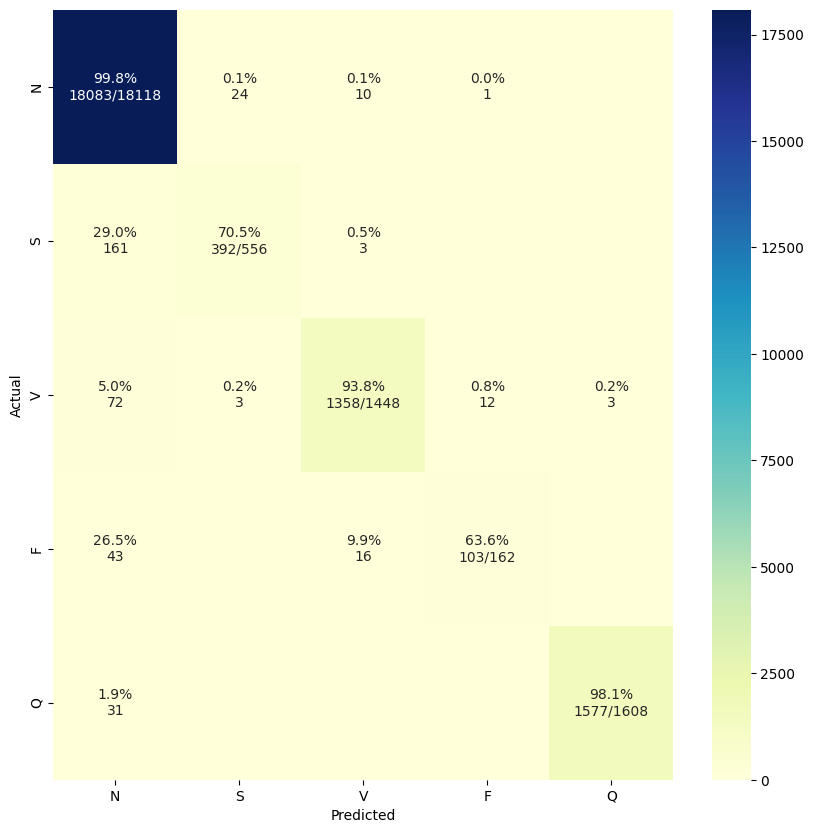

In [39]:
#Confusion Matrix
import seaborn as sns
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    col = ['N','S','V','F','Q']
    cm = pd.DataFrame(cm, index=col, columns=col)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(test_target, pred_idx_arr)

In [2]:
#N (Normal Beats) : 99.8% (18,083 out of 18,118 beats)\
#S (Supraventricular ectopic beat): 70.5% (392 out of 556 beats)
#V (Ventricular ectopic beat): 93.8% (1,358 out of 1,448 beats)
#F (Fusion Beat): 63.6% (103 out of 162 beats)
#Q (Unknown Beat): 98.1% (1,577 out of 1,608 beats)

#N & Q show the highest results
#S & F show the least results due to similar heartbeat signs
#conflicting it to N beats
#This is due to the Imbalance in the Dataset, as the overall accuracy of the model is well off (98.27%)
#(Proper guided datasets can enforce this)